In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
import seaborn as sbn
from sklearn import metrics as mts
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 100
cauchy_dist = sts.cauchy()
X = np.array(cauchy_dist.rvs(N))

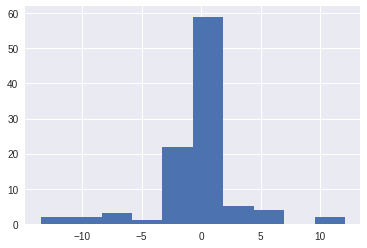

In [4]:
plt.hist(X)
plt.show()

Для $N(\theta, 1)$ априорное распределение: $N(a, \sigma^2)$

Состоятельная оценка: $\theta^* = \frac{\sum^n_{i = 1} x_i + \frac{a}{\sigma^2}}{n + \frac{1}{\sigma^2}}$

Учитывая, что $|\theta| < 0.5$ с вероятностью 0.95, будем считать $2\sigma = 0.5 \rightarrow (a, \sigma^2) = (0, 0.0625)$ 

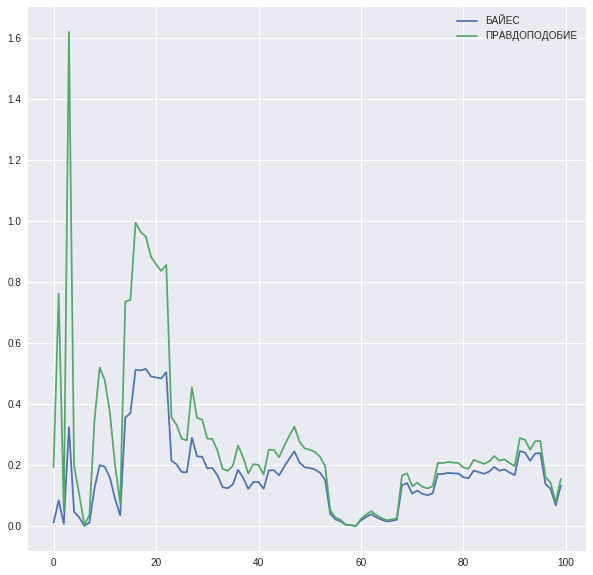

In [5]:
def bayes_est(a, sigma, X):
    return (sum(X) + a / sigma) / (len(X) + 1 / sigma)

a, sigma = 0, 0.0625

bayes_theta = list(map(lambda n: abs(bayes_est(a, sigma, X[:n])), range(1, N + 1)))
likehood_theta = list(map(lambda n: abs(np.average(X[:n])), range(1, N + 1)))

plt.figure(figsize=(10, 10))
plt.plot(list(range(N)), bayes_theta, label='БАЙЕС')
plt.plot(list(range(N)), likehood_theta, label='ПРАВДОПОДОБИЕ')
plt.legend()

Видим, что так как наше предпложение о распределении выборки оказалось не верным, 
мы получаем очень плохие результаты в обоих случаях, не смотря на то, что, казалось бы, 
графики плотности нормального и распределения Коши довольно похожи.

In [8]:
np.average([1,2,3,3,4])

2.6000000000000001